In [1]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import _M_bands, _M_integral, _M_integral_by_parts
from blg_strain.utils.const import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
%matplotlib notebook

# Set up Hamiltonian

In [3]:
from blg_strain.utils.utils import make_grid

In [4]:
kx, ky, Kx, Ky = make_grid([-0.35e9, 0.35e9], [-0.35e9, 0.35e9], 1000, 1000)

Delta = 2
vF = 0.6e6 # m/s
m = Delta/(2*vF**2)
strain = 0.01

def Hfunc(kx, ky, xi):
    return hbar * vF * (np.array([[0*Kx, Kx],[Kx, 0*Kx]])  \
                    + 1j * xi * np.array([[0*Kx, -Ky],[Ky, 0*Kx]]))  \
                    + Delta/2 * np.array([[Ky/Ky, 0*Kx],[0*Kx, -Ky/Ky]]) \
                    + xi * strain * hbar * vF * np.array([[Ky, 0*Kx],[0*Kx, Ky]])

H1 = Hfunc(Kx, Ky, 1)
H2 = Hfunc(Kx, Ky, -1)

# Compare energy

In [5]:
bs1 = BandStructure(xi=1, ham=H1, Delta=Delta, Nkx=1000, Nky=1000)
bs2 = BandStructure(xi=-1, ham=H2, Delta=Delta, Nkx=1000, Nky=1000)

bs1.calculate(1000, 1000)
bs2.calculate(1000, 1000)

# Recalculate berry curvature and magnetic moment using the explicit derivatives of hamiltonian
# Hx = np.gradient(H1, bs1.kx, axis=-2)
# Hy = np.gradient(H1, bs1.ky, axis=-1)
# bs1._Omega, bs1._Mu = berry_mu(bs1._Kx, bs1._Ky, bs1._E, bs1._Psi, xi=bs1.xi, H_gradient = [Hx, Hy])
# Hx = np.gradient(H2, bs2.kx, axis=-2)
# Hy = np.gradient(H2, bs2.ky, axis=-1)
# bs2._Omega, bs2._Mu = berry_mu(bs2._Kx, bs2._Ky, bs2._E, bs2._Psi, xi=bs2.xi, H_gradient = [Hx, Hy])

In [6]:
def E_func1(x, y):
    return 1/2 * np.sqrt(Delta**2 + 4 * hbar**2 * vF**2 * (x**2+y**2))

def E_func(x, y, band=1, xi=1):
    return band * E_func1(x,y) + xi * strain * hbar * vF * y

E1 = E_func(bs1.Kx, bs1.Ky, 1, 1)
E2 = E_func(bs1.Kx, bs1.Ky, 1, -1)

In [7]:
(bs1.E[1]-E1).max(), (bs2.E[1]-E2).max(), (E1.max()-E1.min())

(1.9984014443252818e-15, 1.7763568394002505e-15, 0.02035901781177185)

<IPython.core.display.Javascript object>


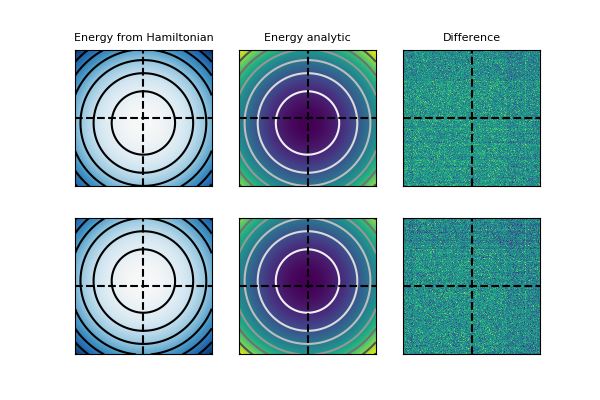

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(6,4))
v = abs(bs1.E[1].max())- Delta/2
ax[0,0].pcolormesh(bs1.Kx, bs1.Ky, bs1.E[1], cmap='RdBu', vmin=Delta/2-v, vmax=Delta/2+v)
ax[0,0].contour(bs1.Kx, bs1.Ky, bs1.E[1], colors='k')#='Greys')
ax[0,1].pcolormesh(bs1.Kx, bs1.Ky, E1)
ax[0,1].contour(bs1.Kx, bs1.Ky, E1, cmap='Greys')
ax[0,2].pcolormesh(bs1.Kx, bs1.Ky, E1-bs1.E[1])
# ax[0,2].contour(bs1.Kx, bs1.Ky, E1-bs1.E[1], cmap='Greys')

# K'
v = abs(bs2.E[1].max())- Delta/2
ax[1,0].pcolormesh(bs2.Kx, bs2.Ky, bs2.E[1], cmap='RdBu', vmin=Delta/2-v, vmax=Delta/2+v)
ax[1,0].contour(bs2.Kx, bs2.Ky, bs2.E[1], colors='k')
ax[1,1].pcolormesh(bs2.Kx, bs2.Ky, E2)
ax[1,1].contour(bs2.Kx, bs2.Ky, E2, cmap='Greys')
ax[1,2].pcolormesh(bs2.Kx, bs2.Ky, E2-bs2.E[1])
# ax[1,2].contour(bs2.Kx, bs2.Ky, E2-bs2.E[1], cmap='Greys')

ax[0,0].set_title('Energy from Hamiltonian', fontsize=8)
ax[0,1].set_title('Energy analytic', fontsize=8)
ax[0,2].set_title('Difference', fontsize=8)

for i in range(2):
    for j in range(3):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].axhline(0, ls='--', c='k')
        ax[i,j].axvline(0, ls='--', c='k')
        ax[i,j].set_aspect(1)

Valence band

<IPython.core.display.Javascript object>


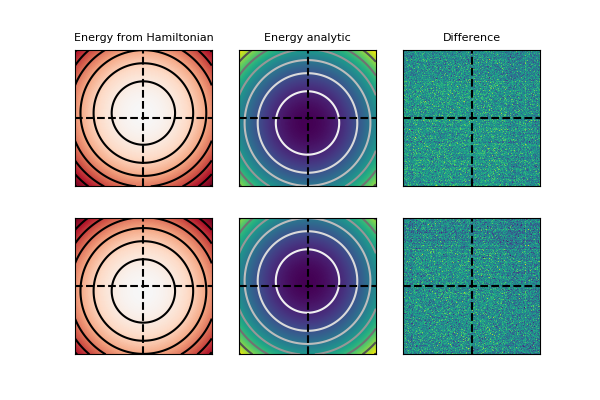

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(6,4))
v = abs(bs1.E[0]).max() - Delta/2
ax[0,0].pcolormesh(bs1.Kx, bs1.Ky, bs1.E[0], cmap='RdBu', vmin=-Delta/2-v, vmax=-Delta/2+v)
ax[0,0].contour(bs1.Kx, bs1.Ky, np.abs(bs1.E[0]), colors='k')#='Greys')
ax[0,1].pcolormesh(bs1.Kx, bs1.Ky, E1)
ax[0,1].contour(bs1.Kx, bs1.Ky, E1, cmap='Greys')
ax[0,2].pcolormesh(bs1.Kx, bs1.Ky, E1-bs1.E[1])
# ax[0,2].contour(bs1.Kx, bs1.Ky, E1-bs1.E[1], cmap='Greys')

# K'
v = abs(bs2.E[0]).max()- Delta/2
ax[1,0].pcolormesh(bs2.Kx, bs2.Ky, bs2.E[0], cmap='RdBu', vmin=-Delta/2-v, vmax=-Delta/2+v)
ax[1,0].contour(bs2.Kx, bs2.Ky, np.abs(bs2.E[0]), colors='k')
ax[1,1].pcolormesh(bs2.Kx, bs2.Ky, E2)
ax[1,1].contour(bs2.Kx, bs2.Ky, E2, cmap='Greys')
ax[1,2].pcolormesh(bs2.Kx, bs2.Ky, E2-bs2.E[1])
# ax[1,2].contour(bs2.Kx, bs2.Ky, E2-bs2.E[1], cmap='Greys')

ax[0,0].set_title('Energy from Hamiltonian', fontsize=8)
ax[0,1].set_title('Energy analytic', fontsize=8)
ax[0,2].set_title('Difference', fontsize=8)

for i in range(2):
    for j in range(3):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].axhline(0, ls='--', c='k')
        ax[i,j].axvline(0, ls='--', c='k')
        ax[i,j].set_aspect(1)

In [10]:
from blg_strain.utils.plotting import plot_bands_3d

<IPython.core.display.Javascript object>


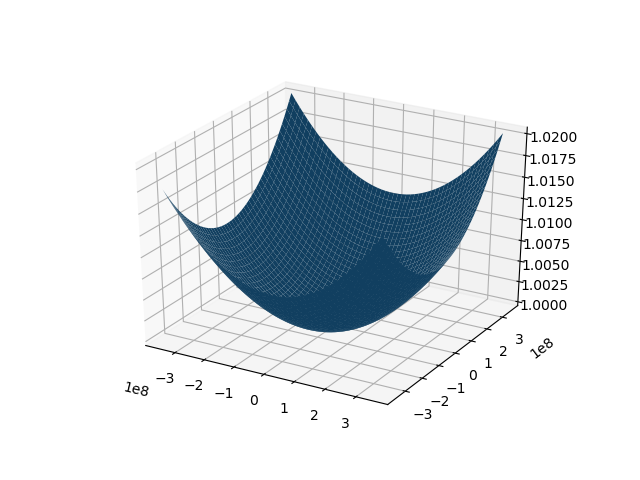

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x23e06f1cac8>)

In [11]:
plot_bands_3d(bs1.Kx, bs1.Ky, bs1.E, which=[1], cmap=None)

<IPython.core.display.Javascript object>


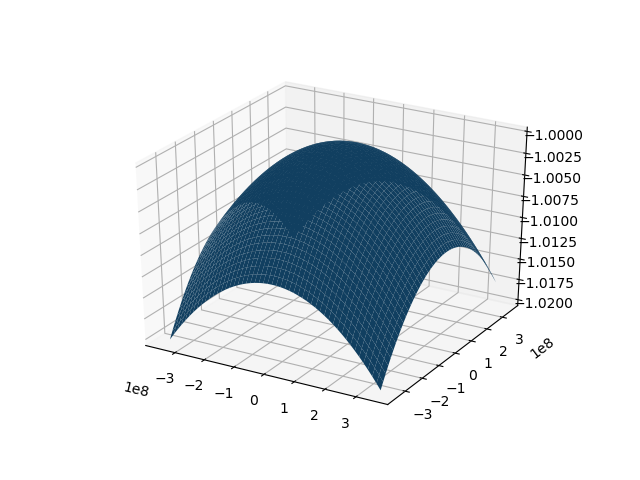

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x23e06f6a6c8>)

In [12]:
plot_bands_3d(bs1.Kx, bs1.Ky, bs1.E, which=[0], cmap=None)

# Check eigenstates and gradients

In [13]:
def norm(kx, ky, xi):
    a = E_func1(kx, ky)
    return np.sqrt(2*(Delta/2 + a)*a)

def fpsi11(kx, ky, xi):
    return Delta/2 + E_func1(kx, ky)

def fpsi12(kx, ky, xi):
    return hbar * vF * kx + 1j * xi * hbar * vF * ky

# def fpsi21(kx, ky, xi):
#     return 1j * xi * hbar * vF * ky  - hbar * vF * kx

# def fpsi22(kx, ky, xi):
#     return psi11(kx, ky, xi)

In [14]:
psi11 = fpsi11(bs1.Kx, bs1.Ky, bs1.xi) / norm(bs1.Kx, bs1.Ky, bs1.xi)
psi12r = fpsi12(bs1.Kx, bs1.Ky, bs1.xi).real / norm(bs1.Kx, bs1.Ky, bs1.xi)
psi12i = fpsi12(bs1.Kx, bs1.Ky, bs1.xi).imag / norm(bs1.Kx, bs1.Ky, bs1.xi)

In [15]:
bs1._Psi.shape

(2, 2, 1000, 1000)

<IPython.core.display.Javascript object>


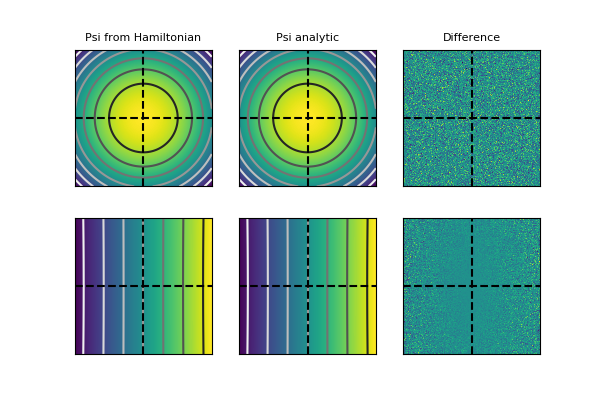

In [16]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(6,4))
ax[0,0].pcolormesh(bs1.Kx, bs1.Ky, bs1._Psi[1][0].real)
ax[0,0].contour(bs1.Kx, bs1.Ky, bs1._Psi[1][0].real, cmap='Greys')
ax[0,1].pcolormesh(bs1.Kx, bs1.Ky, psi11)
ax[0,1].contour(bs1.Kx, bs1.Ky, psi11, cmap='Greys')
ax[0,2].pcolormesh(bs1.Kx, bs1.Ky, bs1._Psi[1][0].real - psi11)
# ax[0,2].contour(bs1.Kx, bs1.Ky, E1-bs1.E[1], cmap='Greys')

ax[1,0].pcolormesh(bs1.Kx, bs1.Ky, bs1._Psi[1][1].real)
ax[1,0].contour(bs1.Kx, bs1.Ky, bs1._Psi[1][1].real, cmap='Greys')
ax[1,1].pcolormesh(bs1.Kx, bs1.Ky, psi12r)
ax[1,1].contour(bs1.Kx, bs1.Ky, psi12r, cmap='Greys')
ax[1,2].pcolormesh(bs1.Kx, bs1.Ky, bs1._Psi[1][1].real - psi12r)


ax[0,0].set_title('Psi from Hamiltonian', fontsize=8)
ax[0,1].set_title('Psi analytic', fontsize=8)
ax[0,2].set_title('Difference', fontsize=8)

for i in range(2):
    for j in range(3):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].axhline(0, ls='--', c='k')
        ax[i,j].axvline(0, ls='--', c='k')
        ax[i,j].set_aspect(1)

# Berry curvature

In [17]:
# def O_func_psi(kx, ky, Psi):
#     Psi_x, Psi_y = np.array(np.gradient(Psi, kx, ky, axis=(-2, -1)))
    
#     return 1j * (Psi_x[0].conjugate() * Psi_y[0]
#                 -Psi_y[0].conjugate() * Psi_x[0]
#                 +Psi_x[1].conjugate() * Psi_y[1]
#                 -Psi_y[1].conjugate() * Psi_x[1]
#                 )


# O1p = O_func_psi(bs1._kx, bs1._ky, bs1._Psi[1]).real
# O2p = O_func_psi(bs2._kx, bs2._ky, bs2._Psi[1]).real

def O_func(E, xi=1):
    return - xi * hbar ** 2 * vF**2 * Delta / (4 * E**3)

O1 = O_func(E_func1(bs1._Kx, bs1._Ky), xi=1)
O2 = O_func(E_func1(bs1._Kx, bs1._Ky), xi=-1)

<IPython.core.display.Javascript object>


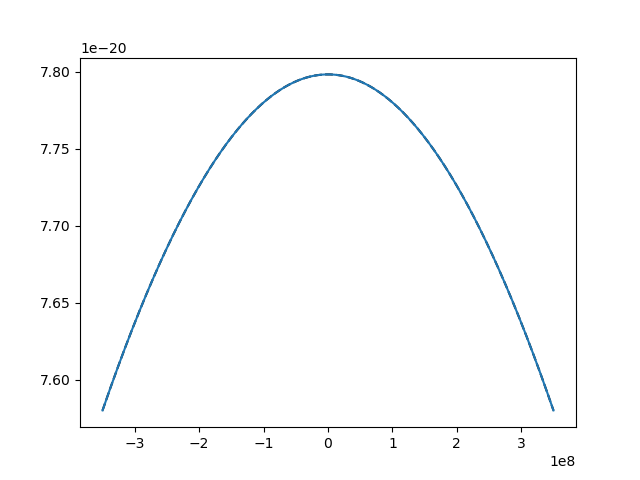

In [18]:
fig, ax = plt.subplots()
# ax.plot(bs1.kx, bs1._Omega[1][:,500], 'k')
ax.plot(bs1.kx, bs2._Omega[1][:,500], 'k--')
# ax.plot(bs1.kx, O1[:,500])
ax.plot(bs1.kx, O2[:,500])

In [19]:
Omin = abs(bs1._Omega[1]).min()
Omax = abs(bs1._Omega[1]).max()

vmax= Omax
vmin = Omax - (Omax-Omin)*2

In [20]:
Omin, Omax, vmin, vmax

(7.371782516630251e-20,
 7.798326825922496e-20,
 6.945238207338006e-20,
 7.798326825922496e-20)

<IPython.core.display.Javascript object>


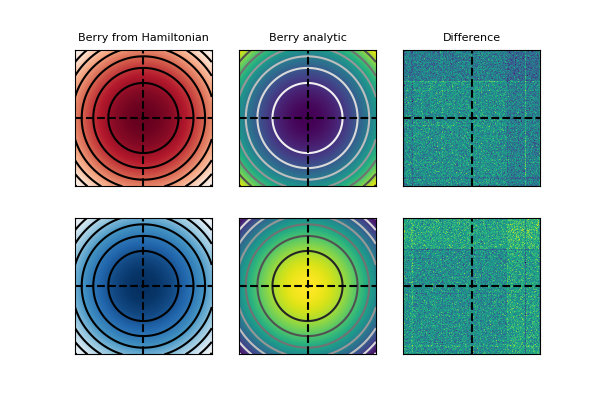

In [58]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(6,4))

Omin = abs(bs1._Omega[1]).min()
Omax = abs(bs1._Omega[1]).max()

vmax= Omax
vmin = Omax - (Omax-Omin)*2

ax[0,0].pcolormesh(bs1.Kx, bs1.Ky, bs1._Omega[1], cmap='RdBu', vmin=-vmax, vmax=-vmin)
ax[0,0].contour(bs1.Kx, bs1.Ky, np.abs(bs1._Omega[1]), colors='k')
ax[0,1].pcolormesh(bs1.Kx, bs1.Ky, O1)
ax[0,1].contour(bs1.Kx, bs1.Ky, O1, cmap='Greys')
ax[0,2].pcolormesh(bs1.Kx, bs1.Ky, O1-bs1._Omega[1])
# ax[0,2].contour(bs1.Kx, bs1.Ky, E1-bs1.E[1], cmap='Greys')

# K'


Omin = abs(bs2._Omega[1]).min()
Omax = abs(bs2._Omega[1]).max()

vmax= Omax
vmin = Omax - (Omax-Omin)*2

ax[1,0].pcolormesh(bs2.Kx, bs2.Ky, bs2._Omega[1], cmap='RdBu', vmin=vmin, vmax=vmax)
ax[1,0].contour(bs2.Kx, bs2.Ky, np.abs(bs2._Omega[1]), colors='k')
ax[1,1].pcolormesh(bs2.Kx, bs2.Ky, O2)
ax[1,1].contour(bs2.Kx, bs2.Ky, O2, cmap='Greys')
ax[1,2].pcolormesh(bs2.Kx, bs2.Ky, O2-bs2._Omega[1])
# ax[1,2].contour(bs2.Kx, bs2.Ky, E2-bs2.E[1], cmap='Greys')

ax[0,0].set_title('Berry from Hamiltonian', fontsize=8)
ax[0,1].set_title('Berry analytic', fontsize=8)
ax[0,2].set_title('Difference', fontsize=8)

for i in range(2):
    for j in range(3):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].axhline(0, ls='--', c='k')
        ax[i,j].axvline(0, ls='--', c='k')
        ax[i,j].set_aspect(1)

<IPython.core.display.Javascript object>


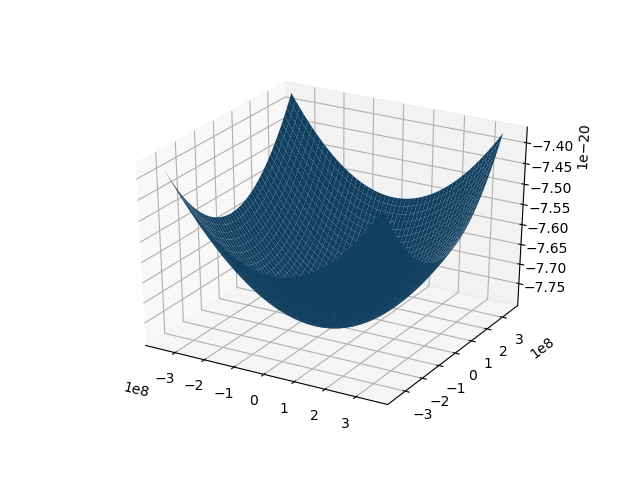

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x23e0d446508>)

In [22]:
plot_bands_3d(bs1.Kx, bs1.Ky, bs1._Omega, which=[1], cmap=None)

# Magnetization

## Relationship between Mu and Omega

<IPython.core.display.Javascript object>


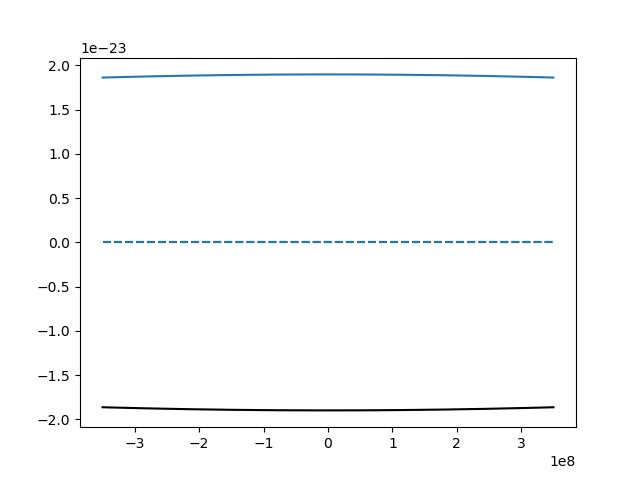

In [59]:
bO1 = bs1.Omega[1][:,500]
bO2 = bs2.Omega[1][:,500]

bM1 = bs1.Mu[1][:,500] * muB
bM2 = bs2.Mu[1][:,500] * muB

bE1 = bs1.E[1][:,500]
bE2 = bs2.E[1][:,500]


fig, ax = plt.subplots()
ax.plot(bs1.kx, q/hbar * bO1 * bE1, 'k')
ax.plot(bs2.kx, q/hbar * bO2 * bE2, 'C0')
ax.plot(bs1.kx, bM1, 'k--')
ax.plot(bs2.kx, bM2, 'C0--')

# ax.plot(bs1.kx, (q/hbar * bO1 * bE1 - bM1)/bM1, 'k')
# ax.plot(bs2.kx, (q/hbar * bO2 * bE2 - bM2)/bM1, 'C0')

## Equilibrium Integrand

<IPython.core.display.Javascript object>


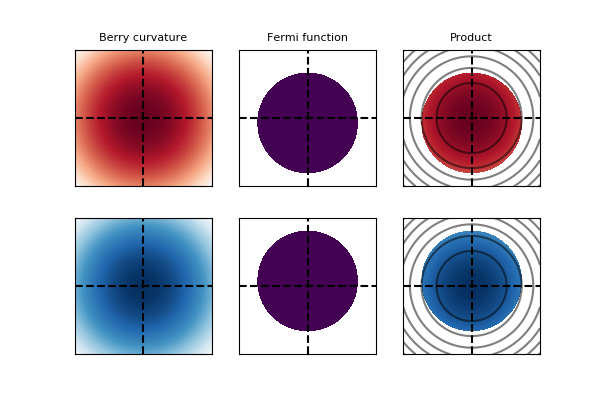

In [158]:
EF = 1.005

feq1 = feq_func(bs1.E[1], EF, T=0)
feq2 = feq_func(bs2.E[1], EF, T=0)

f1 = feq1
f2 = feq2

f1 = np.ma.masked_where(f1==0, f1)
f2 = np.ma.masked_where(f2==0, f2)

integrand1 = f1 * q/hbar * bs1.Omega[1] * EF
integrand2 = f2 * q/hbar * bs2.Omega[1] * EF

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(6,4))

Omin = abs(bs1._Omega[1]).min()
Omax = abs(bs1._Omega[1]).max()

vmax= Omax
vmin = Omax - (Omax-Omin)*2

ax[0,0].pcolormesh(bs1.Kx, bs1.Ky, bs1.Omega[1], cmap='RdBu', vmin=-vmax, vmax=-vmin)
# ax[0,0].contour(bs1.Kx, bs1.Ky, bs1.Omega[1], cmap='Greys')
ax[0,1].pcolormesh(bs1.Kx, bs1.Ky, f1)
ax[0,2].pcolormesh(bs1.Kx, bs1.Ky, bs1.Omega[1]*f1, cmap='RdBu', vmin=-vmax, vmax=-vmin)
ax[0,2].contour(bs1.Kx, bs1.Ky, -bs1.Omega[1], colors='k', alpha=0.5)

# K'


Omin = abs(bs2._Omega[1]).min()
Omax = abs(bs2._Omega[1]).max()

vmax= Omax
vmin = Omax - (Omax-Omin)*2

ax[1,0].pcolormesh(bs2.Kx, bs2.Ky, bs2.Omega[1], cmap='RdBu', vmin=vmin, vmax=vmax)
# ax[1,0].contour(bs2.Kx, bs2.Ky, bs2.Omega[1], cmap='Greys')
ax[1,1].pcolormesh(bs2.Kx, bs2.Ky, f2)
ax[1,2].pcolormesh(bs2.Kx, bs2.Ky, bs2.Omega[1]*f2, cmap='RdBu', vmin=vmin, vmax=vmax)
ax[1,2].contour(bs2.Kx, bs2.Ky, bs2.Omega[1], colors='k', alpha=0.5)#map='Greys')

ax[0,0].set_title('Berry curvature', fontsize=8)
ax[0,1].set_title('Fermi function', fontsize=8)
ax[0,2].set_title('Product', fontsize=8)

for i in range(2):
    for j in range(3):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].axhline(0, ls='--', c='k')
        ax[i,j].axvline(0, ls='--', c='k')
        ax[i,j].set_aspect(1)

### Integrate

In [93]:
from scipy.integrate import simps

In [94]:
M1 = simps(simps(integrand1, bs1.ky, axis=-1), bs1.kx, axis=-1)
M2 = simps(simps(integrand2, bs2.ky, axis=-1), bs2.kx, axis=-1)
M1 + M2

0.0

## Non-equilibrium integrand

In [95]:
EF = 1.005
Efield = 100 # V/meter
Efield = 1e4 # V/meter # unrealistic - for visualization
tau = 1e-12 # 1 picosecond

In [96]:
np.diff(bs1.kx)[0]

700700.7007007003

In [97]:
print('Fermi surface shift for 100 V/m electric field (nm^-1): ', q * 100 * tau / hbar_J / 1e9)
print('Maximum wavevector in window (nm^-1): ', bs1.kx.max() / 1e9)
print('Spacing between grid points (nm^-1): ', np.diff(bs1.kx)[0] / 1e9)
print('The shift in the Fermi surface is < 1/4 of the grid spacing. We will never be able to see it for Efield = 100 V/m!')

Fermi surface shift for 100 V/m electric field (nm^-1):  0.00015192719648744323
Maximum wavevector in window (nm^-1):  0.35
Spacing between grid points (nm^-1):  0.0007007007007007003
The shift in the Fermi surface is < 1/4 of the grid spacing. We will never be able to see it for Efield = 100 V/m!


In [161]:
feq1 = feq_func(bs1.E[1], EF, T=1)
feq2 = feq_func(bs2.E[1], EF, T=1)

fneq1 = q * tau * Efield / hbar_J * np.gradient(feq1, bs1.ky, axis=-1)
fneq2 = q * tau * Efield / hbar_J * np.gradient(feq2, bs2.ky, axis=-1)

f1 = feq1 + fneq1
f2 = feq2 + fneq2

# f1 = np.ma.masked_where(abs(f1)<1e-1, f1)
# f2 = np.ma.masked_where(abs(f2)<1e-1, f2)

integrand1 = f1 * q/hbar * bs1.Omega[1] * EF
integrand2 = f2 * q/hbar * bs2.Omega[1] * EF

<IPython.core.display.Javascript object>


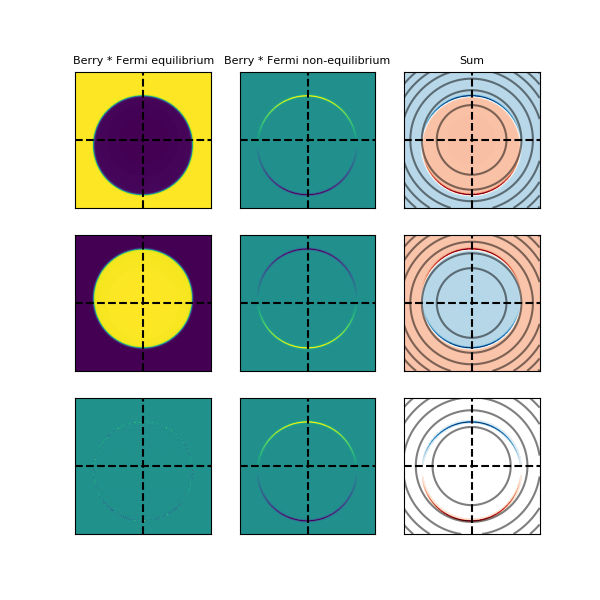

In [162]:
O1 = bs1.Omega[1]#/bs1.Omega[1].max()
O2 = bs2.Omega[1]#/bs2.Omega[1].max()

# integrand1 = f1 * q/hbar * bs1.Omega[1] * EF
# integrand2 = f2 * q/hbar * bs2.Omega[1] * EF

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(6,6))
ax[0,0].pcolormesh(bs1.Kx, bs1.Ky, O1 * feq1)
# ax[0,0].contour(bs1.Kx, bs1.Ky, bs1.Omega[1], cmap='Greys')
ax[0,1].pcolormesh(bs1.Kx, bs1.Ky, O1 * fneq1)
ax[0,2].pcolormesh(bs1.Kx, bs1.Ky, O1 * f1, cmap='RdBu')
ax[0,2].contour(bs1.Kx, bs1.Ky, -bs1.Omega[1], colors='k', alpha=0.5)


# K'
ax[1,0].pcolormesh(bs2.Kx, bs2.Ky, O2 * feq2)
# ax[1,0].contour(bs2.Kx, bs2.Ky, bs2.Omega[1], cmap='Greys')
ax[1,1].pcolormesh(bs2.Kx, bs2.Ky, O2 * fneq2)
ax[1,2].pcolormesh(bs2.Kx, bs2.Ky, O2 * f2, cmap='RdBu')
ax[1,2].contour(bs2.Kx, bs2.Ky, bs2.Omega[1], colors='k', alpha=0.5)#map='Greys')

# K + K' - K' flipped over y
ax[2,0].pcolormesh(bs2.Kx, bs2.Ky, O1 * feq1 + O2[:, ::-1] * feq2[:, ::-1])
ax[2,1].pcolormesh(bs2.Kx, bs2.Ky, O1 * fneq1 + O2[:, ::-1] * fneq2[:, ::-1])
net =  O1 * f1 + O2[:, ::-1] * f2[:, ::-1]
# net =  O1 * f1 + O2 * f2
net = np.ma.masked_where(abs(net)<1e-1*np.max(net), net)
ax[2,2].pcolormesh(bs2.Kx, bs2.Ky,net, cmap='RdBu')
ax[2,2].contour(bs2.Kx, bs2.Ky, -bs1.Omega[1] + bs2.Omega[1][:, ::-1], colors='k', alpha=0.5)#map='Greys')


ax[0,0].set_title('Berry * Fermi equilibrium', fontsize=8)
ax[0,1].set_title('Berry * Fermi non-equilibrium', fontsize=8)
ax[0,2].set_title('Sum', fontsize=8)

for i in range(3):
    for j in range(3):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].axhline(0, ls='--', c='k')
        ax[i,j].axvline(0, ls='--', c='k')
        ax[i,j].set_aspect(1)

<IPython.core.display.Javascript object>


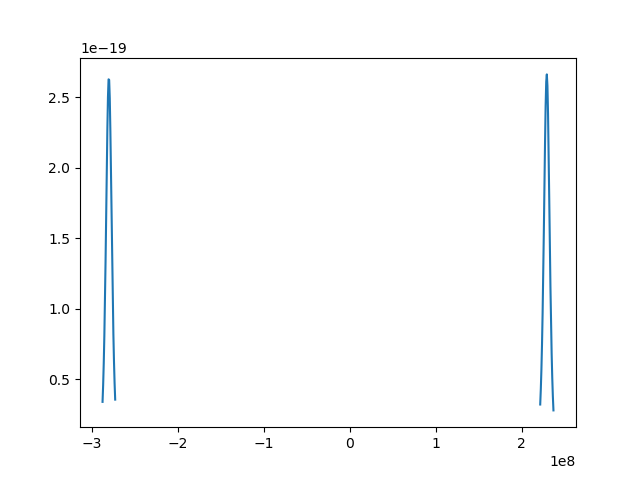

In [154]:
fig, ax = plt.subplots()
ax.plot(bs1.ky, abs(net[500,:]))

In [145]:
integrand = q/hbar * (O1 * f1.data + O2 * f2.data) * EF / (2 * np.pi) ** 2

In [146]:
simps(simps(integrand, bs1.ky, axis=-1), bs1.kx, axis=-1) / (muB * 1e12) / 1e2

0.03749076759060511

In [147]:
integrand = q/hbar * (O1 * fneq1 + O2 * fneq2) * EF / (2 * np.pi) ** 2

In [148]:
simps(simps(integrand, bs1.ky, axis=-1), bs1.kx, axis=-1) / (muB * 1e12) / 1e2

0.037490767590821386

### Integrate not by parts

In [269]:
E = bs1.splE[1](bs1.kx, bs1.ky)
O = bs1.splO[1](bs1.kx, bs1.ky)
Mu = bs1.splM[1](bs1.kx, bs1.ky)

a = Mu
b = q/hbar * O* E
c = q*O/hbar * EF
d = Mu + q * O / hbar * (EF - E)

np.allclose(a/abs(a).max(), b/abs(b).max()), np.allclose(c/abs(c).max(), d/abs(d).max())

(False, False)

But these should still be close enough...

In [270]:
np.allclose(O, bs1.Omega[1]), np.allclose(E, bs1.E[1]), np.allclose(Mu, bs1.Mu[1])

(True, True, True)

In [373]:
E = bs1.splE[1](bs1.kx, bs1.ky)
O = bs1.splO[1](bs1.kx, bs1.ky)
Mu = bs1.splM[1](bs1.kx, bs1.ky)

feq1 = feq_func(bs1.E[1], EF, T=1)
f = q * tau / hbar_J * np.gradient(feq1, bs1.ky, axis=-1)
integrand1 = 1 / (2 * np.pi) **2 * f * (Mu + q * O / hbar * (EF - E)) *100
integrand2 = 1 / (2 * np.pi) **2 * f * (q * O /hbar * EF) *100
integrand = integrand1.copy()
integrand /=  muB * 1e12  # convert to Bohr magneton / um^2

In [374]:
integral1 = simps(simps(integrand, bs1.ky, axis=-1), bs1.kx, axis=-1)

In [375]:
integral1 * 2 

0.02499625960366008

<IPython.core.display.Javascript object>


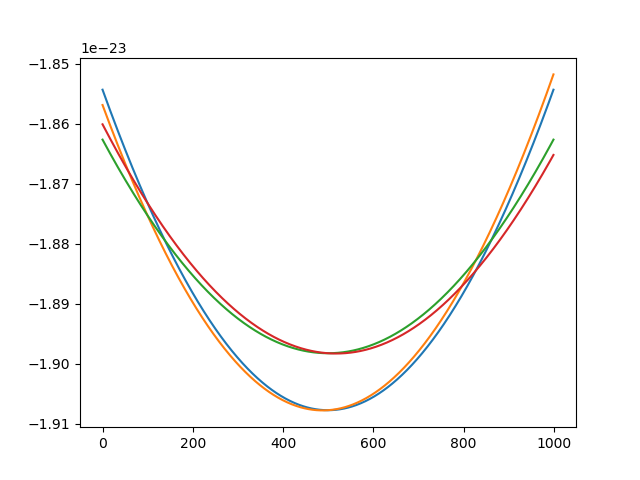

In [365]:
fig, ax = plt.subplots()
# ax.plot((q*O/hbar * EF)[:,500])
# ax.plot((Mu + q*O/hbar *(EF-E))[:,500])

# these two functions are not as equivalent as I assumed...
ax.plot((q*O/hbar * EF)[500,:])
ax.plot((Mu + q*O/hbar *(EF-E))[500,:])


In [376]:
ax.plot((Mu)[500,:])
ax.plot((q*O/hbar *(E))[500,:])

### Integrate not by parts - package

In [387]:
M1 = _M_integral(bs1.kx, bs1.ky, feq1, bs1.splE[1], bs1.splO[1], bs1.splM[1], tau=1e-12, EF=EF) * 100
M2 = _M_integral(bs2.kx, bs2.ky, feq2, bs2.splE[1], bs2.splO[1], bs2.splM[1], tau=1e-12, EF=EF) * 100

M1 + M2

array([3.46944695e-16, 2.49962596e-02])

### Integrate by parts

In [388]:
M1 = _M_integral_by_parts(bs1.kx, bs1.ky, feq1, bs1.splE[1], bs1.splO[1], bs1.splM[1], tau=1e-12, EF=EF) * 100
M2 = _M_integral_by_parts(bs2.kx, bs2.ky, feq2, bs2.splE[1], bs2.splO[1], bs2.splM[1], tau=1e-12, EF=EF) * 100

M1 + M2

array([3.25260652e-17, 2.49962652e-02])

### Analytic

In [278]:
Efield

10000.0

In [328]:
J = 2 * q**2 * tau * (EF-Delta/2)*(Efield/1e2)/(np.pi * hbar * hbar_J)
M = 3 * strain * hbar * vF / Delta * J
M  / (muB * 1e12) / 2

0.037596055876132684

In [329]:
m = Delta/(2*vF**2)
k0 = strain * Delta / (2*hbar_J*vF) # all energies cancel so hbar should be in J
M = 12 * (EF-Delta/2)/(Delta) * q**2 * tau / (2*np.pi *m) *(Efield/1e2) * k0
M  / (muB * 1e12) / 2

0.03759605587613269

In [330]:
m = Delta/(2*vF**2)
k0 = strain * Delta / (2*hbar_J*vF) # all energies cancel so hbar should be in J
M = 12 * q**2 * tau * hbar**2 / (m**2 * Delta) * (Efield/1e2) * k0 * m * (EF-Delta/2)/( 2* np.pi * hbar**2)
M  / (muB * 1e12) / 2

0.037596055876132704

In [331]:
m = Delta/(2*vF**2)
k0 = strain * Delta / (2*hbar_J*vF) # all energies cancel so hbar should be in J
M = 12 * (EF-Delta/2)/Delta * q / (2*np.pi * hbar) * q*tau *Efield/1e2 * hbar *k0 / m
M  / (muB * 1e12) / 2

0.0375960558761327

# Conclusions
- Code works
- There is an extra factor of 2 in Fai and Jie's final formula (originating from their original expression for the magnetization)
- The assumption that $\mu\approx \frac{e}{\hbar}\Omega E$ actually causes the magnetization to be clearly different, even for just 0.1% strain. For a selection of parameters used above, we get 0.0376 $\mu_B/\mu m^2$ under the assumption and 0.025 $\mu_B/\mu m^2$ using the full expression for magnetization involving both the magnetic moment and Berry curvature, a factor of $\sim1.5$ difference. 

# Shifting parabolas

<IPython.core.display.Javascript object>


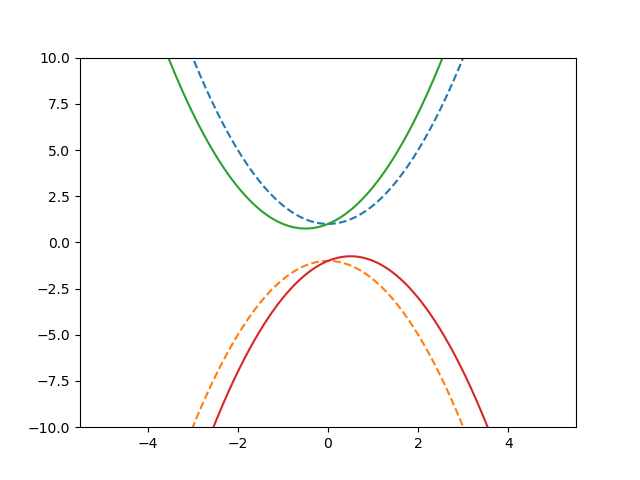

(-10, 10)

In [386]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots()
ax.plot(x, x**2+1, '--')
ax.plot(x, -x**2-1, '--')
ax.plot(x, x**2+1*x+1)
ax.plot(x, -x**2+1*x-1)

ax.set_ylim(-10, 10)

# Fermi shift 1D

In [31]:
k = np.linspace(-1,1, 100000)
def E(k):
    return k**2

In [32]:
EF = 0.5
f = feq_func(E(k), EF, T=10)

<IPython.core.display.Javascript object>


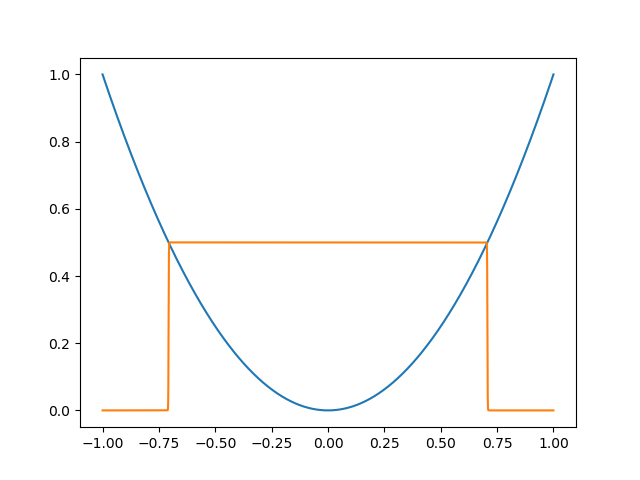

In [33]:
fig, ax = plt.subplots()
ax.plot(k, E(k))
ax.plot(k, f*EF)

In [37]:
dk = 0.0001  # e*E*tau/hbar

<IPython.core.display.Javascript object>


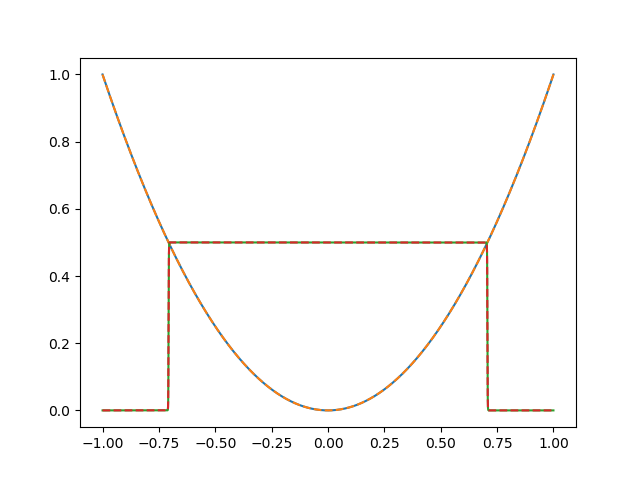

In [38]:
fig, ax = plt.subplots()
ax.plot(k, E(k))
ax.plot(k, E(k+dk), '--')

fneq = f + dk * np.gradient(f, k)
ax.plot(k, f*EF)
ax.plot(k, fneq*EF, '--')

<IPython.core.display.Javascript object>


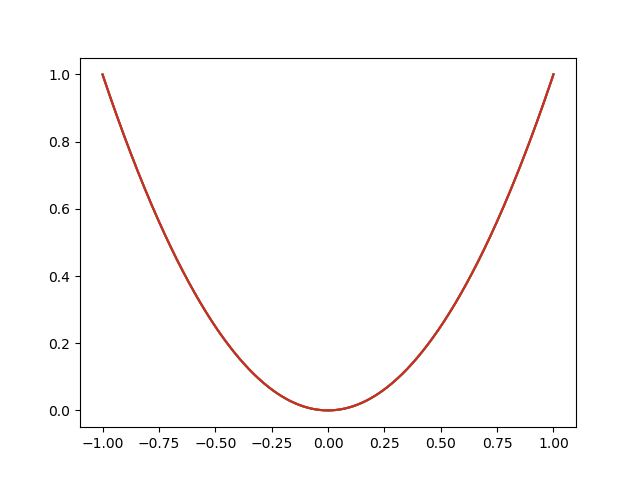

In [39]:
fig, ax = plt.subplots()
ax.plot(k, E(k+dk))

Eapprox = E(k) + dk*np.gradient(E(k), k)
ax.plot(k, E(k))
ax.plot(k, E(k+dk))
ax.plot(k, Eapprox)

# Redo calculation 

## Start with the numerical Psis

The product of matrices 
$$
\left(\begin{array}{cc}
a & b
\end{array}
\right)
\left(\begin{array}{cc}
c & d\\
e & f
\end{array}
\right)
\left(\begin{array}{c}
g \\ h
\end{array}
\right)
= 
\left(\begin{array}{cc}
ac +be & ad + bf
\end{array}
\right)
\left(\begin{array}{c}
g \\ h
\end{array}
\right)
=
(ac+be)g + (ad+bf)h
$$

In [29]:
bs1._Psi.shape

(2, 2, 1000, 1000)

In [30]:
H1.reshape(4, *H1.shape[-2:]).shape

(4, 1000, 1000)

In [31]:
Hx = np.gradient(H1, bs1.kx, axis=-2)
Hy = np.gradient(H1, bs1.ky, axis=-1)

In [32]:
prefactor = -2 / (bs1._E[1] - bs1._E[0]) ** 2

a = bs1._Psi[1][0].conjugate()
b = bs1._Psi[1][1].conjugate()
c, d, e, f = Hx.reshape(4, *Hx.shape[-2:])
g = bs1._Psi[0][0]
h = bs1._Psi[0][1]

term1 = (a*c+b*e)*g + (a*d+b*f)*h
psi_n = bs1._Psi[1]
psi_m = bs1._Psi[0]
term1a = np.einsum('ijk,iljk,ljk->jk',psi_n.conj(), Hx, psi_m, optimize=True)

a = bs1._Psi[0][0].conjugate()
b = bs1._Psi[0][1].conjugate()
c, d, e, f = Hy.reshape(4, *Hy.shape[-2:])
g = bs1._Psi[1][0]
h = bs1._Psi[1][1]

term2 = (a*c+b*e)*g + (a*d+b*f)*h
psi_n = bs1._Psi[1]
psi_m = bs1._Psi[0]
term2a = np.einsum('ijk,iljk,ljk->jk',psi_m.conj(), Hy, psi_n, optimize=True)

O1n = np.imag(prefactor * term1 * term2)

In [33]:
O = np.imag(term1 * term2) * prefactor

In [34]:
np.allclose(term1, term1a), np.allclose(term2,term2a)

(True, True)

In [35]:
Hx = np.gradient(H1, bs1.kx, axis=-2)
Hy = np.gradient(H1, bs1.ky, axis=-1)
bs1._Omega, bs1._Mu = berry_mu(bs1._Kx, bs1._Ky, bs1._E, bs1._Psi, xi=bs1.xi, H_gradient = [Hx, Hy])
Hx = np.gradient(H2, bs2.kx, axis=-2)
Hy = np.gradient(H2, bs2.ky, axis=-1)
bs2._Omega, bs2._Mu = berry_mu(bs2._Kx, bs2._Ky, bs2._E, bs2._Psi, xi=bs2.xi, H_gradient = [Hx, Hy])

<IPython.core.display.Javascript object>


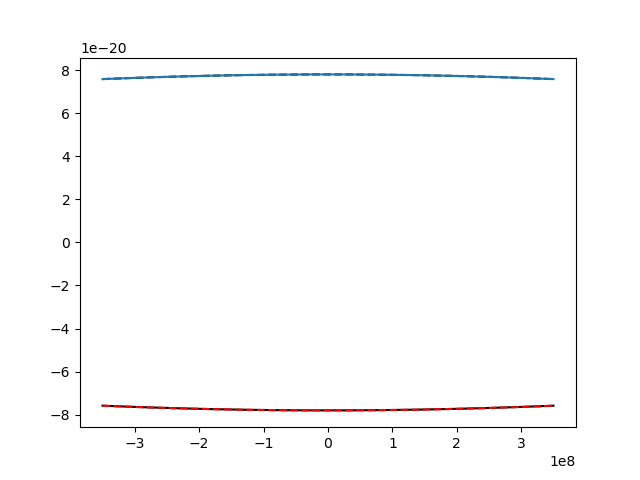

In [36]:
fig, ax = plt.subplots()
ax.plot(bs1.kx, bs1._Omega[1][:,500], 'k-')
ax.plot(bs1.kx, bs2._Omega[1][:,500], 'k--')
ax.plot(bs1.kx, O1[:,500], 'r--')
ax.plot(bs1.kx, O2[:,500])
# ax.plot(bs1.kx, O1n[:,500], 'k--')
# ax.plot(bs1.kx, O[:,500], 'r:')
# ax.plot(bs1.kx, O2[:,500])

# Papers

https://journals-aps-org.proxy.library.cornell.edu/prl/pdf/10.1103/PhysRevLett.115.216806
    https://www.nature.com/articles/nphys2442.pdf